# Inspect Jingcheng's biophysical modeling results

In [29]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
import ast
from matplotlib.animation import FuncAnimation

# ignore runtime warning
warnings.filterwarnings("ignore", category=RuntimeWarning)

root_folder_path = '/G/results/simulation/'

*The root_folder_path of the datasets is D:. Please change it according to the path where you save these datasets in local.*

### Necessary functions for analysis

In [12]:
def load_data(exp):
    
    try:
        # v_path = [root_folder_path, exp, 'dend_v_array.npy']
        # i_path = [root_folder_path, exp, 'dend_i_array.npy']
        # nmda_path = [root_folder_path, exp, 'dend_nmda_i_array.npy']
        # ampa_path = [root_folder_path, exp, 'dend_ampa_i_array.npy']
        
        # nmda_g_path = [root_folder_path, exp, 'dend_nmda_g_array.npy']
        # ampa_g_path = [root_folder_path, exp, 'dend_ampa_g_array.npy']
        
        soma_path = [root_folder_path, exp, 'soma_v_array.npy']
        apic_v_path = [root_folder_path, exp, 'apic_v_array.npy']
        # apic_ica_path = [root_folder_path, exp, 'apic_ica_array.npy']

        # soma_i_path = [root_folder_path, exp, 'soma_i_array.npy']
            
        # trunk_v_path = [root_folder_path, exp, 'trunk_v_array.npy']
        # basal_v_path = [root_folder_path, exp, 'basal_v_array.npy']
        # tuft_v_path = [root_folder_path, exp, 'tuft_v_array.npy']

        # basal_bg_i_nmda_path = [root_folder_path, exp, 'basal_bg_i_nmda_array.npy']
        # basal_bg_i_ampa_path = [root_folder_path, exp, 'basal_bg_i_ampa_array.npy']
        # tuft_bg_i_nmda_path = [root_folder_path, exp, 'tuft_bg_i_nmda_array.npy']
        # tuft_bg_i_ampa_path = [root_folder_path, exp, 'tuft_bg_i_ampa_array.npy']
        
        # seg_v_path = [root_folder_path, exp, 'seg_v_array.npy']

        # v = np.load(os.path.join(*v_path))
        # i = np.load(os.path.join(*i_path))
        # nmda = np.load(os.path.join(*nmda_path))
        # ampa = np.load(os.path.join(*ampa_path))
        
        # nmda_g = np.load(os.path.join(*nmda_g_path))
        # ampa_g = np.load(os.path.join(*ampa_g_path))
        
        soma = np.load(os.path.join(*soma_path))
        apic_v = np.load(os.path.join(*apic_v_path))
        # apic_ica = np.load(os.path.join(*apic_ica_path))

        # soma_i = np.load(os.path.join(*soma_i_path))

        # trunk_v = np.load(os.path.join(*trunk_v_path))
        # basal_v = np.load(os.path.join(*basal_v_path))
        # tuft_v = np.load(os.path.join(*tuft_v_path))

        # basal_bg_i_nmda = np.load(os.path.join(*basal_bg_i_nmda_path))
        # basal_bg_i_ampa = np.load(os.path.join(*basal_bg_i_ampa_path))
        # tuft_bg_i_nmda = np.load(os.path.join(*tuft_bg_i_nmda_path))
        # tuft_bg_i_ampa = np.load(os.path.join(*tuft_bg_i_ampa_path)) 

        # seg_v = np.load(os.path.join(*seg_v_path))

    except FileNotFoundError:
        pass

    dt = 1/40000

    # read info from json and add to plot
    with open(os.path.join(root_folder_path, exp, 'simulation_params.json')) as f:
        simu_info = json.load(f)
    
    with open(os.path.join(root_folder_path, exp, 'section_synapse_df.csv')) as f:
        sec_syn_df = pd.read_csv(f)

    try:
        return v, i, nmda, ampa, nmda_g, ampa_g, soma, apic_v, apic_ica, soma_i, \
               trunk_v, basal_v, tuft_v, basal_bg_i_nmda, basal_bg_i_ampa, \
               tuft_bg_i_nmda, tuft_bg_i_ampa, dt, simu_info, sec_syn_df
    
    except NameError:
        return soma, apic_v, dt, simu_info, sec_syn_df

## Visualization

In [13]:
def visualization(exp, syn_num=0, trial_idx=0, t_start=0, t_end=1000):
    try:
        v, i, nmda, ampa, nmda_g, ampa_g, soma, apic_v, apic_ica, soma_i, \
        trunk_v, basal_v, tuft_v, basal_bg_i_nmda, basal_bg_i_ampa, \
        tuft_bg_i_nmda, tuft_bg_i_ampa, dt, simu_info, sec_syn_df = load_data(exp)
    
    except ValueError:
        soma, apic_v, dt, simu_info, sec_syn_df = load_data(exp)
    
    if soma.ndim == 4:
        soma = np.mean(soma, axis=1) # shape: [num_times, num_affs, num_trials]
        apic_v = np.mean(apic_v, axis=1) # shape: [num_times, num_affs, num_trials]

    t_start, t_end = t_start*40, t_end*40
    t_vals = np.arange(t_start, t_end)*dt 
    
    # Set up the figure
    num_subplots = 4
    fig1, axes = plt.subplots(num_subplots, 1, figsize=(min(10, 40*(t_end-t_start)//(1000*40)), num_subplots*2), sharex=False)
    plt.ion()

    # Main title
    axes[0].set_title('Membrane Potential of Dendritic Tree and Soma during Naturalistic Drive', fontsize=16, fontweight='bold')
    axes[0].set_title('Soma EPSPs')# recorded simultaneously across the dendritic tree and soma during naturalistic drive')
    axes[0].set_ylim(-90, 20)
 
    # for syn_num in [0,5,15,20,30,36]:
    for syn_num in range(0, soma.shape[1], 6):
        alpha = min(1, 0.2+0.8*(syn_num+1)/soma.shape[1])
        # Subplot 1: Soma; Subplot 2: Nexus; Subplot 3: Dend
        axes[0].plot(1000 * t_vals, soma[t_start:t_end, syn_num, trial_idx].squeeze(), alpha=alpha, color='k')#, label='Soma EPSP')
        axes[1].plot(1000 * t_vals, apic_v[t_start:t_end, syn_num, trial_idx].squeeze(), alpha=alpha, color='salmon')#, label='Calcium Zone')
        
    axes[0].plot(1000 * t_vals, np.mean(soma[t_start:t_end, 0, :]) * np.ones_like(t_vals), color='k', linestyle='--', label='Soma EPSP Baseline')
    axes[1].plot(1000 * t_vals, np.mean(apic_v[t_start:t_end, 0, :]) * np.ones_like(t_vals), color='salmon', linestyle='--', label='Calcium EPSP Baseline')
    
    # Create the raster plot (cluster, background excitatory and inhibitory)
    # clus_sec_syn_df = sec_syn_df[sec_syn_df['cluster_flag'] == 1].sort_values(by='pre_unit_id', ascending=True).reset_index(drop=True)

    exc_bg_sec_syn_df = sec_syn_df[sec_syn_df['type'].isin(['A'])][:100]
    inh_bg_sec_syn_df = sec_syn_df[sec_syn_df['type'].isin(['B'])][:100]
    
    # for i, (spike_train, syn_region) in enumerate(zip(clus_sec_syn_df['spike_train'], clus_sec_syn_df['region'])):
    #     try:
    #         spike_train = ast.literal_eval(spike_train)[-1]  # Convert string to list   
    #     except IndexError:
    #         spike_train = []

    #     if len(spike_train) > 0:
    #         color = 'purple'
    #         axes[2].vlines(spike_train, i + 0.5, i + 1.5, color=color, linewidth=6) #2+(syn_num+1)/v.shape[2]*4)  # Set color based on type

    for i, (spike_train, syn_region) in enumerate(zip(exc_bg_sec_syn_df['spike_train_bg'], exc_bg_sec_syn_df['region'])):
        try:
            spike_train = ast.literal_eval(spike_train)[0]  # Convert string to list
        except IndexError:
            spike_train = []
            
        if len(spike_train) > 0:
            color = 'blue' if syn_region == 'basal' else 'red' if syn_region == 'apical' else 'black'
            axes[num_subplots-2].vlines(spike_train, i + 0.5, i + 1.5, color=color, linewidth=6)  # Set color based on type

    for i, (spike_train, syn_region) in enumerate(zip(inh_bg_sec_syn_df['spike_train_bg'], inh_bg_sec_syn_df['region'])):
        try:
            spike_train = ast.literal_eval(spike_train)[-1]  # Convert string to list
        except IndexError:
            spike_train = []
            
        if len(spike_train) > 0:
            color = 'blue' if syn_region == 'basal' else 'red' if syn_region == 'apical' else 'black'
            axes[num_subplots-1].vlines(spike_train, i + 0.5, i + 1.5, color=color, linewidth=6) #2+(syn_num+1)/v.shape[2]*4)  # Set color based on type

    for ax_idx in range(num_subplots):
        axes[ax_idx].set_ylabel('Voltage (mV)')
        _, labels = axes[ax_idx].get_legend_handles_labels()
        if labels:
            axes[ax_idx].legend(loc='upper right', fontsize=6, frameon=False)

    for ax, title in zip(axes[2:], [
                                    # 'Synchronous stimulated synaptic inputs', 
                                    'Raster Plot of Background Excitatory Spike Trains', 
                                    'Raster Plot of Background Inhibitory Spike Trains']):
        ax.set_xlim(t_start // 40, t_end // 40)
        ax.set_ylabel('Neuron Index')
        ax.set_title(title)
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    for ax_idx in range(num_subplots):    
        # Remove top and right spines
        axes[ax_idx].spines['top'].set_visible(False)
        axes[ax_idx].spines['right'].set_visible(False)

    axes[-1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    axes[-1].set_xlabel('Time (ms)')

    # Adjust layout to prevent overlap
    fig1.tight_layout() 
    
    # Save the figure
    title = f'syn{syn_num}_trial{trial_idx}_t{t_start//40}-{t_end//40}'
    # if not os.path.exists('/G/results/simulation/Invivo_Simu_SJC'):
    #     os.makedirs('/G/results/simulation/Invivo_Simu_SJC')

In [14]:
def animate_visualization(exp, title_var, trial_idx=0, t_start=0, t_end=1000):
    try:
        v, i, nmda, ampa, nmda_g, ampa_g, soma, apic_v, apic_ica, soma_i, \
        trunk_v, basal_v, tuft_v, basal_bg_i_nmda, basal_bg_i_ampa, \
        tuft_bg_i_nmda, tuft_bg_i_ampa, dt, simu_info, sec_syn_df = load_data(exp)
    except ValueError:
        v, i, nmda, ampa, nmda_g, ampa_g, soma, apic_v, apic_ica, dt, simu_info = load_data(exp)

    if v.ndim == 5:
        v = np.mean(v, axis=2)
        soma = np.mean(soma, axis=1)
        apic_v = np.mean(apic_v, axis=1)
        trunk_v = np.mean(trunk_v, axis=1)
        basal_v = np.mean(basal_v, axis=1)
        tuft_v = np.mean(tuft_v, axis=1)

    t = simu_info['time point of stimulation']
    t_start, t_end = t_start * 40, t_end * 40
    t_vals = np.arange(t_start, t_end) * dt
    x_vals = 1000 * t_vals  # in ms

    syn_num_list = list(range(0, v.shape[2], 1))
    color_list = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12']
    num_clus = min(v.shape[0], len(color_list))

    fig, axes = plt.subplots(6, 1, figsize=(12, 9), sharex=True)
    plt.ioff() 

    # Set titles, labels, limits, vertical lines, and threshold lines
    ylims = [(-80, -65), (-75, -55), (-80, 0), (-80, -45), (-80, -10), (-80, -10)]
    titles = ['Soma', 'Apical', 'Dendritic', 'Trunk', 'Basal', 'Tuft']
    line_objects = []

    for i, ax in enumerate(axes):
        ax.set_ylim(*ylims[i])
        ax.set_ylabel('Voltage (mV)')
        ax.set_title(titles[i])
        ax.axvline(x=t - 20, color='r', linestyle='--', alpha=1)
        ax.axvline(x=t + 20, color='r', linestyle='--', alpha=1)

    axes[-1].set_xlabel('Time (ms)')

    # Create and store Line2D objects
    line_objects.append(axes[0].plot(x_vals, soma[t_start:t_end, 0, trial_idx], color='k')[0])
    line_objects.append(axes[1].plot(x_vals, apic_v[t_start:t_end, 0, trial_idx], color='salmon')[0])
    for clus in range(num_clus):
        line_objects.append(
            axes[2].plot(x_vals, v[clus, t_start:t_end, 0, trial_idx], color=color_list[clus])[0]
        )
    line_objects.append(axes[3].plot(x_vals, trunk_v[t_start:t_end, 0, trial_idx], color='orange')[0])
    line_objects.append(axes[4].plot(x_vals, basal_v[t_start:t_end, 0, trial_idx], color='navy')[0])
    line_objects.append(axes[5].plot(x_vals, tuft_v[t_start:t_end, 0, trial_idx], color='darkred')[0])

    # Add threshold lines
    axes[0].plot(x_vals, np.mean(soma[t_start:t_end, 0, :]) * np.ones_like(x_vals), linestyle='--', color='k')
    axes[1].plot(x_vals, np.mean(apic_v[t_start:t_end, 0, :]) * np.ones_like(x_vals), linestyle='--', color='salmon')
    axes[2].plot(x_vals, np.mean(v[:, t_start:t_end, 0, :]) * np.ones_like(x_vals), linestyle='--', color=color_list[0])
    axes[3].plot(x_vals, np.mean(trunk_v[t_start:t_end, 0, :]) * np.ones_like(x_vals), linestyle='--', color='orange')
    axes[4].plot(x_vals, np.mean(basal_v[t_start:t_end, 0, :]) * np.ones_like(x_vals), linestyle='--', color='navy')
    axes[5].plot(x_vals, np.mean(tuft_v[t_start:t_end, 0, :]) * np.ones_like(x_vals), linestyle='--', color='darkred')

    def update(frame_idx):
        syn_num = syn_num_list[frame_idx]
        fig.suptitle(f"Membrane Potentials with Synapse Number {syn_num*2}", fontsize=14)

        line_objects[0].set_ydata(soma[t_start:t_end, syn_num, trial_idx])
        line_objects[1].set_ydata(apic_v[t_start:t_end, syn_num, trial_idx])
        for clus in range(num_clus):
            line_objects[2 + clus].set_ydata(v[clus, t_start:t_end, syn_num, trial_idx])
            line_objects[2 + clus].set_alpha(1 if num_clus == 1 else 0.3)
        line_objects[2 + num_clus].set_ydata(trunk_v[t_start:t_end, syn_num, trial_idx])
        line_objects[3 + num_clus].set_ydata(basal_v[t_start:t_end, syn_num, trial_idx])
        line_objects[4 + num_clus].set_ydata(tuft_v[t_start:t_end, syn_num, trial_idx])

        plt.tight_layout()
        
        return line_objects

    ani = FuncAnimation(fig, update, frames=len(syn_num_list), interval=500, blit=True)
    
    rec_loc, range_idx, spat_cond, epoch_idx = title_var
    if not os.path.exists(f"/G/results/simulation/voltage_dynamics/vitro_A/{rec_loc}_range{range_idx}_{spat_cond}/"):
        os.makedirs(f"/G/results/simulation/voltage_dynamics/vitro_A/{rec_loc}_range{range_idx}_{spat_cond}/")
    ani.save(f"/G/results/simulation/voltage_dynamics/vitro_A/{rec_loc}_range{range_idx}_{spat_cond}/epoch{epoch_idx}.gif", writer="pillow")

### Natural Visualization

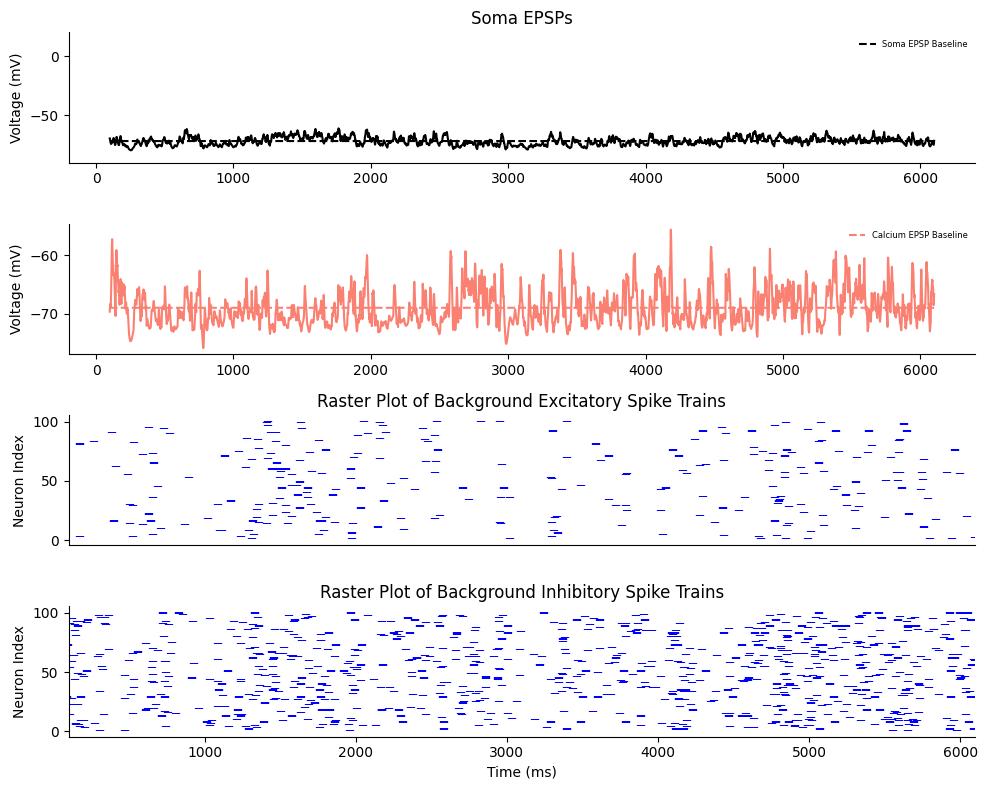

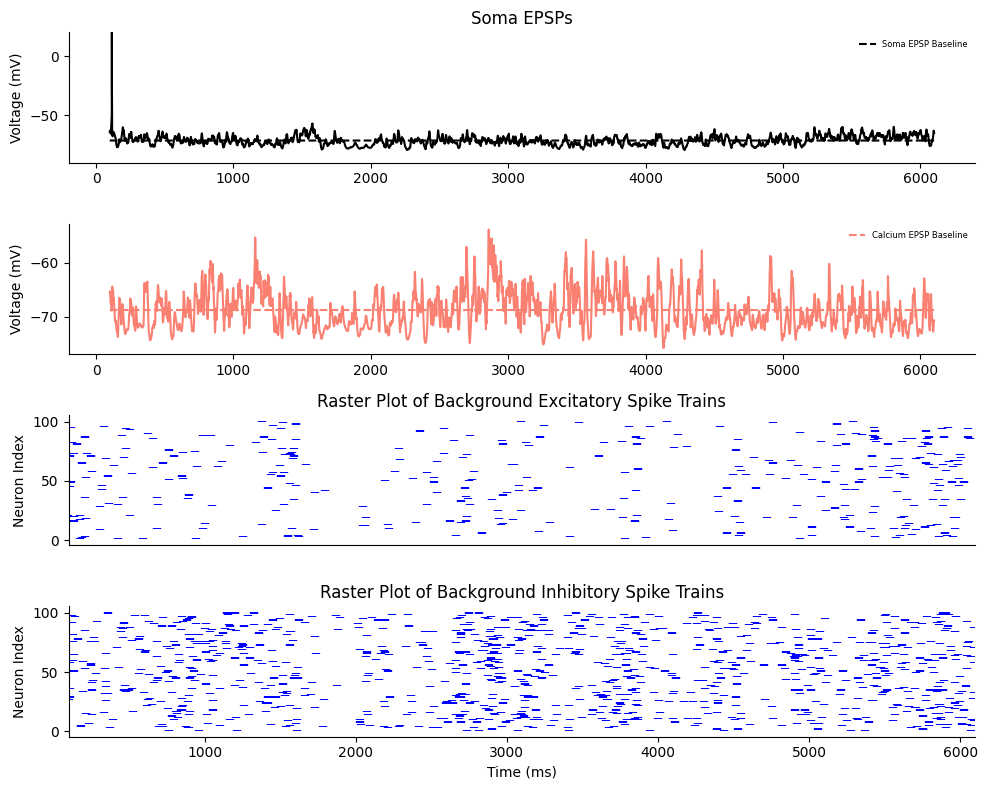

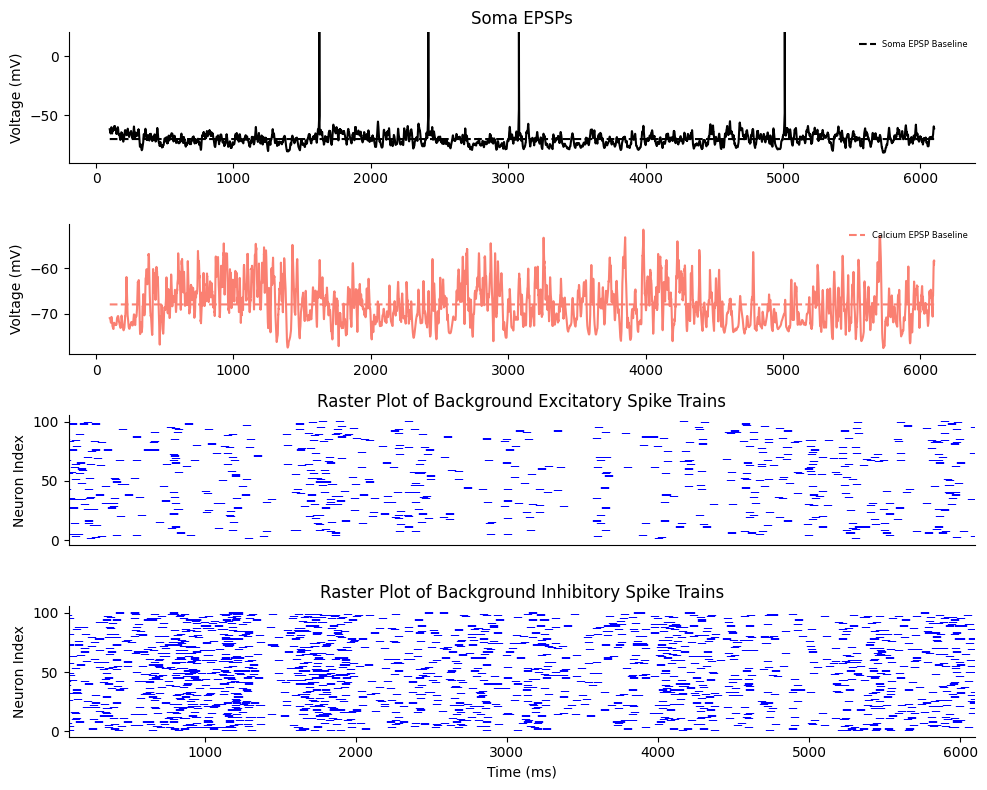

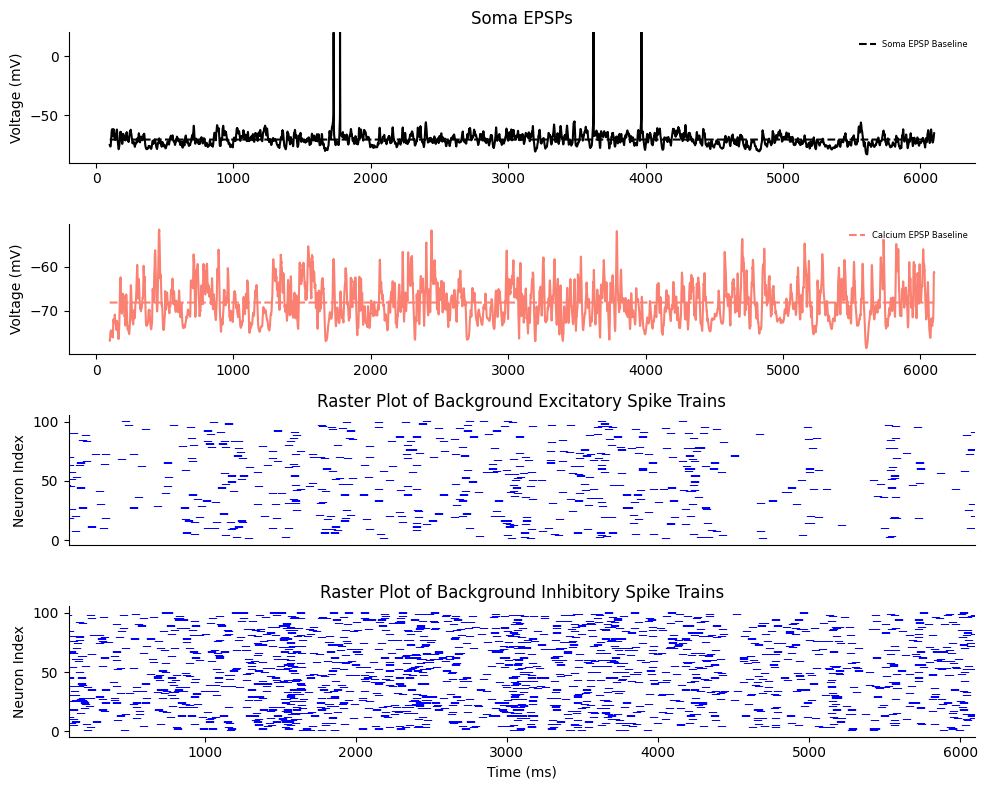

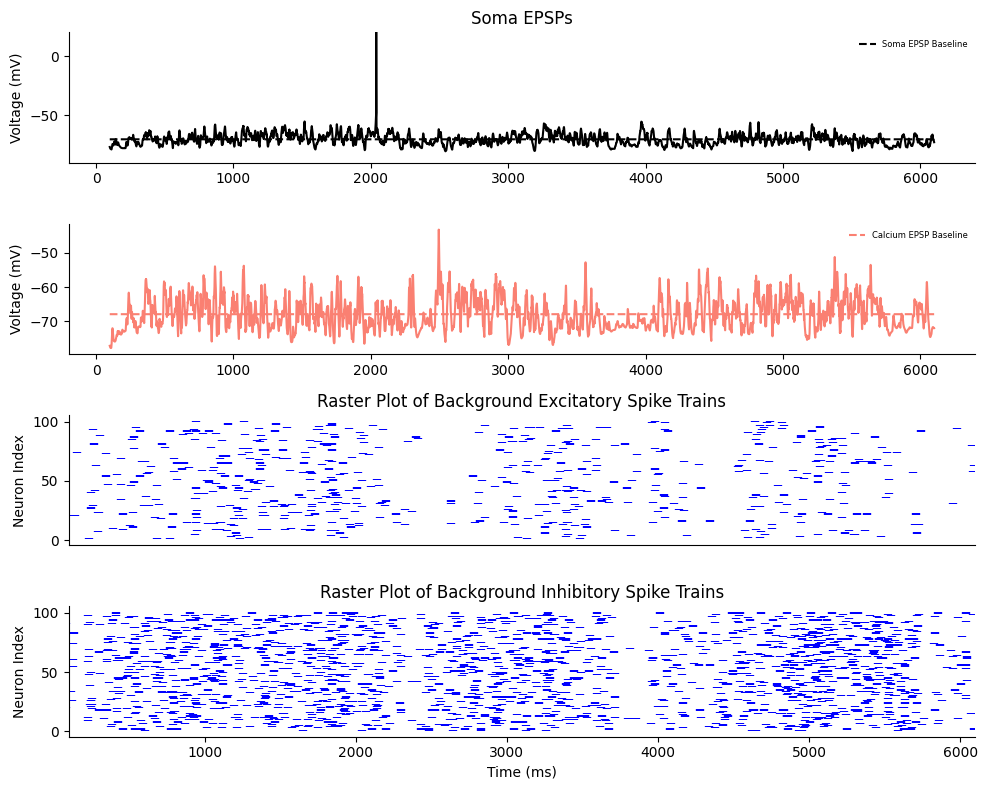

In [50]:
syn_num, trial_idx = 0, 0
fig_idx = 4
for epoch_idx in range(901+fig_idx*5, 901+(fig_idx+1)*5):
    visualization(f'basal_range0_clus_invivo_NATURAL_funcgroup2_var2_AMPA/1/{epoch_idx}', 
                  syn_num=syn_num, trial_idx=trial_idx, t_start=100, t_end=6100)

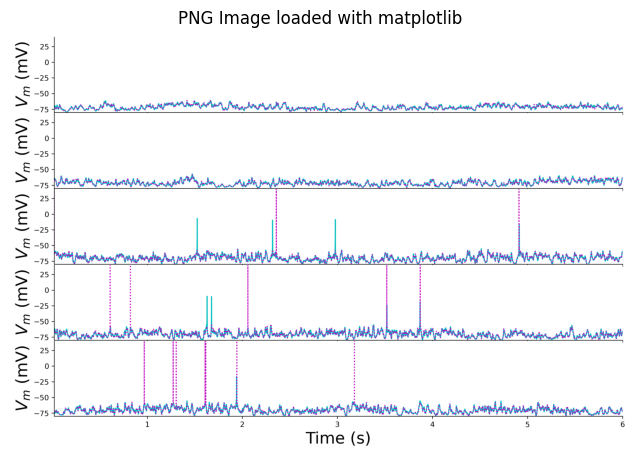

In [51]:
def load_png_matplotlib(image_path):
    """使用matplotlib加载并显示PNG图片"""
    try:
        img = mpimg.imread(image_path)
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')  # 隐藏坐标轴
        plt.title('PNG Image loaded with matplotlib')
        plt.show()
        return img
    except FileNotFoundError:
        print(f"文件未找到: {image_path}")
        return None

fpr = 0.0002
image_path = f"../results/5_main_figure_replication/SJC_funcgroup2_var2_AMPA_fullStrategy_fpr{fpr}/main_figure_replication_{fig_idx}_SJC_funcgroup2_var2_AMPA_fullStrategy_fpr{fpr}.png"

# 检查文件是否存在
if os.path.exists(image_path):
    # 示例1: 使用matplotlib加载
    img_array = load_png_matplotlib(image_path)